In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
TRAIN_PATH = 'train/'

X1 = pd.read_csv(TRAIN_PATH + 'X1.csv')
X2 = pd.read_csv(TRAIN_PATH + 'X2.csv')
X3 = pd.read_csv(TRAIN_PATH + 'X3.csv')

Y = pd.read_csv(TRAIN_PATH + 'Y.csv')

X1.head()

,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,1,-1.0,-1.0,107.0,255.0,537.0,10.0,41.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,5,0,0.0,0.0,20.0,0.0,188.0,1.0,25.0,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,6,1,0.0,0.0,158.0,155.0,3092.0,3.0,218.0,29.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,8,1,0.0,0.0,102.0,343.0,341.0,0.0,24.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,10,1,0.0,0.0,1.0,1.0,33.0,0.0,41.0,1.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


# PCA

In [5]:
print(X3.shape)
X3.head()

(4000, 453)


,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452
0,3,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.022222,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.044444,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.044444,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.044444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.022222,0.0,0.088889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.022222,0.0,0.0,0.0,0.000000
1,5,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0

In [8]:
from sklearn.decomposition import PCA

for n in range(3,20):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X3)
    evr = pca.explained_variance_ratio_
    print(evr)


[9.99999984e-01 2.67906240e-09 1.23171863e-09]
[9.99999984e-01 2.67906240e-09 1.23171863e-09 9.68542481e-10]
[9.99999984e-01 2.67906240e-09 1.23171863e-09 9.68542481e-10
 7.45251130e-10]
[9.99999984e-01 2.67906240e-09 1.23171863e-09 9.68542481e-10
 7.45251129e-10 5.53731592e-10]
[9.99999984e-01 2.67906240e-09 1.23171863e-09 9.68542481e-10
 7.45251130e-10 5.53731723e-10 4.55923809e-10]
[9.99999984e-01 2.67906240e-09 1.23171863e-09 9.68542481e-10
 7.45251130e-10 5.53731807e-10 4.55923428e-10 4.16343035e-10]
[9.99999984e-01 2.67906240e-09 1.23171863e-09 9.68542481e-10
 7.45251130e-10 5.53731780e-10 4.55923645e-10 4.16341578e-10
 3.92858037e-10]
[9.99999984e-01 2.67906240e-09 1.23171863e-09 9.68542481e-10
 7.45251130e-10 5.53731803e-10 4.55923772e-10 4.16343435e-10
 3.92861073e-10 3.44063306e-10]
[9.99999984e-01 2.67906240e-09 1.23171863e-09 9.68542481e-10
 7.45251131e-10 5.53731818e-10 4.55923879e-10 4.16344402e-10
 3.92861776e-10 3.44063858e-10 3.08617956e-10]
[9.99999984e-01 2.67906240e

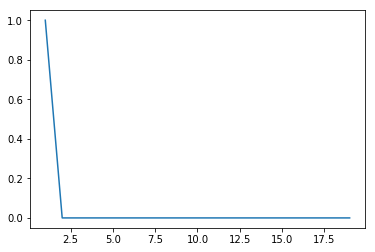

In [11]:
x = range(1,20)
plt.plot(x, evr)

In [14]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,4057.31125,-0.084056,-0.021410,-0.067483,-0.024899,0.037583,-0.018606,0.017225,0.018457,-0.021595,0.009483,-0.013872,-0.014321,-0.040667,-0.022972,0.005353,0.026302,-0.037136,0.014726
1,4055.31125,-0.119340,-0.102972,0.169457,0.016136,0.011010,0.045085,0.049251,0.017688,-0.017983,0.008842,0.014496,0.045905,-0.029496,-0.005027,0.004338,-0.011967,-0.010166,-0.011407
2,4054.31125,0.103442,-0.032310,0.052503,-0.002571,-0.009900,-0.032825,-0.055669,-0.031846,0.011702,-0.031373,-0.043489,-0.034568,0.046477,-0.011173,-0.108324,0.050103,-0.014761,-0.051731
3,4052.31125,-0.049768,-0.039010,-0.065975,0.025294,0.113175,0.053967,0.001545,0.008524,-0.019527,0.001928,-0.001303,0.028872,-0.001596,-0.018380,-0.012860,-0.009723,0.019589,0.017749
4,4050.31125,-0.151655,0.181794,-0.027108,-0.016949,-0.027242,0.012521,-0.015272,-0.004630,-0.029956,0.050424,0.072270,-0.003565,-0.000476,-0.037960,-0.011950,-0.025564,-0.001023,-0.001082
5,4049.31125,-0.026151,-0.098914,0.202282,0.046563,-0.027216,0.001446,0.006339,-0.004571,0.005036,-0.032678,0.008092,-0.040335,0.007347,0.007378,-0.089992,0.046954,0.007257,-0.050465
6,4047.31125,0.063993,0.007219,-0.045474,-0.005251,-0.024270,0.015506,-0.005163,-0.038535,-0.047857,-0.038343,-0.001038,0.002473,-0.014585,-0.026745,-0.016385,-0.023189,0.024277,-0.008005
7,4045.31125,0.058580,-0.008582,-0.035804,-0.015704,0.036506,0.030086,-0.019607,0.006493,-0.022924,-0.009725,-0.028073,-0.026398,-0.000414,-0.013366,0.000621,-0.010367,0.005265,0.003431
8,4043.31125,0.020564,-0.020657,-0.058610,-0.011631,-0.008821,-0.020749,0.025798,0.010396,-0.031199,-0.009563,-0.006613,0.014829,-0.036822,0.044560,0.021457,0.050882,-0.013686,0.053647
9,4042.31125,-0.057156,-0.031439,0.021326,0.008085,-0.006640,-0.049239,-0.078608,-0.015707,0.027359,-0.016712,-0.005523,0.001113,0.051093,-0.002262,-0.014738,-0.004306,0.012407,0.023052


In [15]:
principalDf.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,2.183924e-13,1.804112e-19,1.929013e-18,-1.504038e-17,-2.408664e-18,5.904999e-18,5.733261e-19,2.327999e-18,1.484056e-18,-2.567391e-18,-1.917563e-17,2.086872e-17,5.077536e-18,3.309852e-18,1.908196e-18,-5.950102e-19,1.312752e-18,8.257284e-19,-4.989065e-18
std,2.310147e+03,1.195724e-01,8.107658e-02,7.189506e-02,6.306538e-02,5.436125e-02,4.932713e-02,4.713745e-02,4.578885e-02,4.285085e-02,4.058438e-02,3.927687e-02,3.867336e-02,3.633788e-02,3.523517e-02,3.401076e-02,3.352529e-02,3.270541e-02,3.208788e-02
min,-3.995689e+03,-3.041913e-01,-3.131153e-01,-2.169248e-01,-1.667605e-01,-2.487531e-01,-4.505186e-01,-3.250300e-01,-3.446601e-01,-2.937655e-01,-2.354463e-01,-2.579032e-01,-3.126379e-01,-3.155238e-01,-1.942671e-01,-4.394036e-01,-4.079343e-01,-3.623622e-01,-3.391353e-01
25%,-2.012939e+03,-9.294972e-02,-3.947673e-02,-4.840227e-02,-2.726649e-02,-2.686218e-02,-2.301979e-02,-2.563206e-02,-2.148905e-02,-2.283182e-02,-1.633370e-02,-1.990292e-02,-2.156107e-02,-1.817215e-02,-1.635967e-02,-1.547352e-02,-1.482432e-02,-1.302111e-02,-1.164002e-02
50%,-5.688750e+00,-2.168930e-02,-1.194461e-02,-1.385362e-02,-1.078659e-02,-4.820086e-03,1.304934e-03,-2.384545e-03,-3.264312e-03,-5.651415e-03,-1.462676e-03,-2.669521e-03,-4.554961e-03,-3.770367e-03,-2.815859e-03,-2.091109e-03,-2.918847e-03,1.144647e-03,-9.361018e-05
75%,1.982561e+03,6.622407e-02,2.248879e-02,3.508818e-02,1.150152e-02,2.071441e-02,2.395410e-02,2.482230e-02,1.904108e-02,1.477164e-02,1.392605e-02,1.616665e-02,1.602566e-02,1.398976e-02,1.150665e-02,1.302407e-02,1.092170e-02,1.460463e-02,1.155396e-02
max,4.057311e+03,8.584680e-01,8.595212e-01,6.674937e-01,9.237589e-01,7.855143e-01,4.768329e-01,3.275603e-01,7.113211e-01,3.727740e-01,7.371931e-01,3.187084e-01,5.646015e-01,6.036472e-01,7.924434e-01,6.742333e-01,4.667106e-01,4.903349e-01,7.361737e-01


In [3]:
print(len(X1['id'].unique()), len(Y['id'].unique()))
print(X1['id'].head())
print(Y['id'].head())
#print(X1['id'] == Y['id'])

4000 4000
0     3
1     5
2     6
3     8
4    10
Name: id, dtype: int64
0     3
1     5
2     6
3     8
4    10
Name: id, dtype: int64


In [4]:
X1.dtypes

id      int64
1       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24      int64
25      int64
dtype: object

In [5]:
X1.head(10)

num_cols = ['4', '5']

In [9]:
print(data['2'].unique())

data = X1

bin_cols = []
cat_cols = []
num_cols = []

for c in X1.columns:
    if c == 'id':
        continue
    unique_vals = len(data[c].unique())
    print(c, unique_vals)

    if unique_vals == 2:
        bin_cols.append(c)
    elif unique_vals > 2 and unique_vals < 10:
        cat_cols.append(c)
    else:
        num_cols.append(c)
            

[-1.  0.  1. -2.  2.]
1 2
2 5
3 5
4 531
5 721
6 677
7 115
8 452
9 52
10 2
11 2
12 2
13 2
14 2
15 2
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 2
24 2
25 2


In [10]:

print('bin cols:', len(bin_cols), bin_cols)
print('cat cols:', len(cat_cols), cat_cols)
print('num cols:', len(num_cols), num_cols)

bin cols: 17 ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
cat cols: 2 ['2', '3']
num cols: 6 ['4', '5', '6', '7', '8', '9']


In [13]:
data.dtypes

id       int64
1        int64
2     category
3     category
4      float64
5      float64
6      float64
7      float64
8      float64
9      float64
10       int64
11       int64
12       int64
13       int64
14       int64
15       int64
16       int64
17       int64
18       int64
19       int64
20       int64
21       int64
22       int64
23       int64
24       int64
25       int64
dtype: object

In [12]:
data[cat_cols] = data[cat_cols].astype('category')

In [14]:
data[cat_cols].describe()

,2,3
count,4000.0,4000.0
unique,5.0,5.0
top,0.0,0.0
freq,3662.0,3803.0


In [ ]:
for c in cat_cols:
    print(c, data[c].unique())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2059658208>,
      dtype=object)

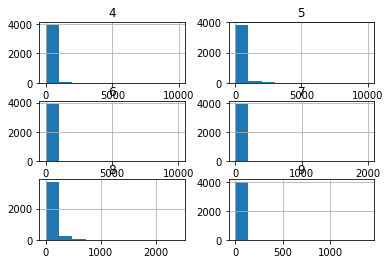

In [15]:
data[num_cols].hist()

In [16]:
# преобразование категориальных признаков в бинарные (dummy)
data_categorical = pd.get_dummies(data[cat_cols])
data_categorical.head()

,2_-2.0,2_-1.0,2_0.0,2_1.0,2_2.0,3_-2.0,3_-1.0,3_0.0,3_1.0,3_2.0
0,0,1,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0


In [17]:
# нормализация значений количественных признаков
data_numerical = data[num_cols]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,4,5,6,7,8,9
count,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,-9.750742e-16,-2.991302e-15,-1.922022e-16,-3.246015e-17,2.228079e-17,-9.216308e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.858413e-01,-2.990186e-01,-4.309300e-01,-1.327443e-01,-7.109900e-01,-1.064104e-01
25%,-2.802718e-01,-2.990186e-01,-3.103755e-01,-1.327443e-01,-5.466666e-01,-1.064104e-01
50%,-2.468546e-01,-2.990186e-01,-1.917973e-01,-1.163257e-01,-2.852430e-01,-6.995911e-02
75%,-9.369265e-02,-1.477209e-01,5.833059e-03,-8.348850e-02,1.629117e-01,-3.350784e-02
max,2.746989e+01,1.592594e+01,1.933210e+01,3.252382e+01,1.728242e+01,5.077957e+01


In [18]:
# объединяем все признаки в единый DataFrame
data = pd.concat((data_numerical, data[bin_cols], data_categorical), axis=1)
data = pd.DataFrame(data, dtype=float)

In [19]:
print(data.shape)
print(data.columns)
data.head()

(4000, 33)
Index(['4', '5', '6', '7', '8', '9', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '2_-2.0', '2_-1.0', '2_0.0', '2_1.0', '2_2.0', '3_-2.0', '3_-1.0', '3_0.0', '3_1.0', '3_2.0'], dtype='object')


,4,5,6,7,8,9,1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2_-2.0,2_-1.0,2_0.0,2_1.0,2_2.0,3_-2.0,3_-1.0,3_0.0,3_1.0,3_2.0
0,0.012128,0.114718,0.630345,0.031442,-0.404751,-0.106410,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.230146,-0.299019,-0.059385,-0.116326,-0.524259,-0.033508,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.154151,-0.047532,5.679800,-0.083489,0.917306,0.950677,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.001795,0.257497,0.242989,-0.132744,-0.531728,-0.033508,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.283057,-0.297396,-0.365712,-0.132744,-0.404751,-0.069959,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
X = data
y = Y
feature_names = X.columns
y.head()

,id,1,2,3,4,5
0,3,1,1,0,0,1
1,5,0,1,0,0,0
2,6,0,1,0,0,0
3,8,1,0,0,0,0
4,10,0,0,1,1,0


In [47]:
# разделяем датасет на тестовую и обучающую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

target_cols = ['1', '2', '3', '4', '5']

2800 1200


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# цикл по всем колонкам матрицы с таргетами
for tc in target_cols:
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train[tc])
    
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    
    err_train = np.mean(Y_train[tc] != y_train_predict)
    err_test  = np.mean(Y_test[tc]  != y_test_predict)
    print(y_test_predict[:5], knn.predict_proba(X_test)[:5], err_train, err_test, roc_auc_score(Y_test[tc], knn.predict_proba(X_test)[:, 1]))

[0 0 0 1 0] [[0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.4 0.6]
 [0.6 0.4]] 0.24214285714285713 0.37916666666666665 0.5073535929091485
[0 0 0 1 0] [[0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [0.2 0.8]
 [0.6 0.4]] 0.26607142857142857 0.4191666666666667 0.5105195303507022
[0 0 0 0 0] [[0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [0.6 0.4]] 0.25607142857142856 0.37583333333333335 0.5511066847263166
[0 0 0 0 0] [[0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]] 0.255 0.38666666666666666 0.5363727448615508
[1 0 0 0 0] [[0.4 0.6]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]] 0.2764285714285714 0.4083333333333333 0.528462700090607


In [ ]:
from sklearn.svm import SVC

for tc in target_cols:
    svc = SVC()
    svc.fit(X_train, Y_train[tc])

    err_train = np.mean(Y_train[tc] != svc.predict(X_train))
    err_test  = np.mean(Y_test[tc]  != svc.predict(X_test))
    print(err_train, err_test)

In [49]:
from sklearn import ensemble

for tc in target_cols:
    rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
    rf.fit(X_train, Y_train[tc])

    #print(rf.predict(X_train[:5]))
    
    err_train = np.mean(Y_train[tc] != rf.predict(X_train))
    err_test  = np.mean(Y_test[tc]  != rf.predict(X_test))
    print(err_train, err_test, roc_auc_score(Y_test[tc], rf.predict_proba(X_test)[:, 1]))
    
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    print("Feature importances:")
    for f, idx in enumerate(indices):
        print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))


0.0 0.3375 0.5510018993352326
0.00035714285714285714 0.38166666666666665 0.5517519760570946
0.00035714285714285714 0.3275 0.6200493984543064
0.0007142857142857143 0.3566666666666667 0.5565386451580481
0.00035714285714285714 0.3958333333333333 0.5243204469948656


In [ ]:
from sklearn import ensemble
from sklearn.metrics import roc_auc_score

for tc in target_cols:
    gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
    gbt.fit(X_train, Y_train[tc])

    err_train = np.mean(Y_train[tc] != gbt.predict(X_train))
    err_test  = np.mean(Y_test[tc]  != gbt.predict(X_test))
    print(err_train, err_test, roc_auc_score(Y_test[tc], gbt.predict_proba(X_test)[:, 1]))

# отбираем только наиболее важные признаки

In [37]:
print(X_train.columns)
Xl_train = []
Xl_test = []

Xl_train.append(X_train[['6', '8', '4', '5', '7', '9', '1', '13', '22', '24']])
Xl_test.append(X_test[['6', '8', '4', '5', '7', '9', '1', '13', '22', '24']])

Xl_train.append(X_train[['6', '8', '4', '5', '7', '9', '1', '13', '22', '24']])
Xl_test.append(X_test[['6', '8', '4', '5', '7', '9', '1', '13', '22', '24']])


Index(['4', '5', '6', '7', '8', '9', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '2_-2.0', '2_-1.0', '2_0.0', '2_1.0', '2_2.0', '3_-2.0', '3_-1.0', '3_0.0', '3_1.0', '3_2.0'], dtype='object')


In [51]:
X_train = X_train[['6', '8', '4', '5', '7', '9', '1', '13', '22', '24']]
X_test = X_test[['6', '8', '4', '5', '7', '9', '1', '13', '22', '24']]

In [53]:
for tc in target_cols:
    rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
    rf.fit(X_train, Y_train[tc])

    #print(rf.predict(X_train[:5]))
    
    err_train = np.mean(Y_train[tc] != rf.predict(X_train))
    err_test  = np.mean(Y_test[tc]  != rf.predict(X_test))
    print(err_train, err_test, roc_auc_score(Y_test[tc], rf.predict_proba(X_test)[:, 1]))
    
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    print("Feature importances:")
    for f, idx in enumerate(indices):
        print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))


0.0 0.3333333333333333 0.5614909781576448
Feature importances:
 1. feature '4    ' (0.2300)
 2. feature '5    ' (0.2060)
 3. feature '6    ' (0.1647)
 4. feature '7    ' (0.1163)
 5. feature '8    ' (0.0956)
 6. feature '9    ' (0.0888)
 7. feature '1    ' (0.0296)
 8. feature '10   ' (0.0265)
 9. feature '11   ' (0.0251)
10. feature '12   ' (0.0175)
0.00035714285714285714 0.38083333333333336 0.5457570409024632
Feature importances:
 1. feature '4    ' (0.2157)
 2. feature '5    ' (0.2110)
 3. feature '6    ' (0.1721)
 4. feature '7    ' (0.1220)
 5. feature '8    ' (0.0950)
 6. feature '9    ' (0.0863)
 7. feature '1    ' (0.0293)
 8. feature '10   ' (0.0276)
 9. feature '11   ' (0.0248)
10. feature '12   ' (0.0162)
0.00035714285714285714 0.345 0.5899577722890605
Feature importances:
 1. feature '4    ' (0.2185)
 2. feature '5    ' (0.2068)
 3. feature '6    ' (0.1664)
 4. feature '7    ' (0.1201)
 5. feature '8    ' (0.0975)
 6. feature '9    ' (0.0864)
 7. feature '1    ' (0.0367)
 8

# поиск наилучших значений гиперпараметров по сетке

In [54]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

# Инициализируем стратифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
parameters = {'n_estimators': [10, 50, 100, 200],
              'max_features': [4, 7, 10], 
              'min_samples_leaf': [1, 5, 7], 
              'max_depth': [5,15,20]}

rfc = RandomForestClassifier(random_state=42, 
                             n_jobs=-1, oob_score=True)

gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X_train, Y_train['1'])

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=True, random_state=42,
                                              verbose=0, warm_start=False

In [61]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=5, max_features=4, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                        warm_start=False), 0.7071428571428572)

In [62]:
rf = gcv.best_estimator_
tc = '1'

err_train = np.mean(Y_train[tc] != rf.predict(X_train))
err_test  = np.mean(Y_test[tc]  != rf.predict(X_test))
print(err_train, err_test, roc_auc_score(Y_test[tc], rf.predict_proba(X_test)[:, 1]))

0.0 0.3375 0.5510018993352326

0.2864285714285714 0.3258333333333333 0.5844998417220639
